In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('EDAData.csv')

In [4]:
# Drop Extra Column in Data
df = df.drop(columns="Unnamed: 0")

In [30]:
sns.set_style("darkgrid")

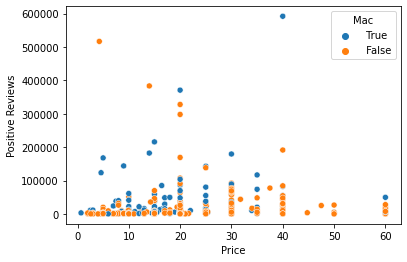

In [8]:
# Show Price compared to Positive Reviews, showing whether it is on Mac or not
sns.scatterplot(data=df, x="Price", y="Positive Reviews", hue = "Mac")
plt.show()

In [7]:
df.groupby("Mac")["Price", "Positive Reviews", "Negative Reviews"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Price,Positive Reviews,Negative Reviews
Mac,,,
False,24.24760,13828.698276,1793.894397
True,17.98109,19760.987805,1883.308943


In [19]:
# Find average Prices by Engine
df.groupby("Engine")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Engine,,,,,,,,
Unity Engine,325.0,19.792096,10.43444,0.69,12.679104,19.99,24.99,59.99
Unreal Engine,320.0,24.268667,13.26031,1.99,14.990000,19.99,29.99,59.99


In [22]:
# Find average Positive Reviews by Engine
df.groupby("Engine")["Positive Reviews"].describe()

,count,mean,std,min,25%,50%,75%,max
Engine,,,,,,,,
Unity Engine,346.0,20669.369942,61330.191274,2.0,594.0,2832.0,11487.25,592170.0
Unreal Engine,364.0,11335.486264,33638.722836,1.0,371.5,1582.0,7639.00,370971.0


In [23]:
df.groupby(df["Discounted Percent"] > 0).mean()

,AppID,Review Score,Positive Reviews,Negative Reviews,Total Review,Units Sold (Estimated),Is Free,Price,Initial Price,Discounted Percent,Required Age
Discounted Percent,,,,,,,,,,,
False,612645.576923,7.051775,15416.423077,1786.585799,17203.008876,344060.177515,0.060651,22.589927,22.589927,0.000000,2.448225
True,573850.588235,7.529412,25182.852941,2586.147059,27769.000000,555380.000000,0.000000,11.645866,36.763181,69.029412,4.000000


In [52]:
# Look at differences between whether or not the game is free
df.groupby(["Is Free", "Review Score"])["Positive Reviews"].describe()

count          mean           std     min      25%  \
Is Free Review Score                                                       
False   0               4.0      1.500000      0.577350     1.0     1.00   
        3               1.0      1.000000           NaN     1.0     1.00   
        4              16.0    397.562500    738.130880     5.0    19.25   
        5              96.0   1741.270833   3960.046242    15.0   133.50   
        6             131.0   4223.839695  10830.509417     7.0   349.00   
        7               5.0     24.800000     12.557866    12.0    15.00   
        8             340.0  18873.338235  57625.668831    55.0  1072.25   
        9              76.0  52482.684211  75215.113936   653.0  8734.50   
True    0               5.0      3.000000      2.121320     1.0     1.00   
        4               1.0      5.000000           NaN     5.0     5.00   
        5               6.0   3600.166667   6681.470599    41.0   221.50   
        6               8.0   8281.625000  15855.320413    37.0   124.00   
        8              20.0   2555.500000   4620.280972    70.0   151.75   
        9               1.0   6139.000000           NaN  6139.0  6139.00   

                          50%       75%       max  
Is Free Review Score                               
False   0                 1.5      2.00       2.0  
        3                 1.0      1.00       1.0  
        4               108.0    370.00    2888.0  
        5               634.5   1325.50   28716.0  
        6              1158.0   3020.50   91104.0  
        7                21.0     36.00      40.0  
        8              4384.0  11837.50  592170.0  
        9             21348.5  70872.25  383402.0  
True    0                 3.0      4.00       6.0  
        4                 5.0      5.00       5.0  
        5              1083.5   2019.00   17128.0  
        6               672.5   5840.75   43876.0  
        8               328.0   1110.75   15272.0  
        9              6139.0   6139.00    6139.0

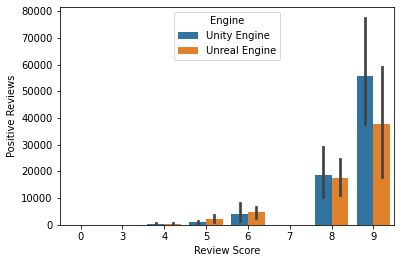

In [23]:
# Barplot showing Differences in mean positive reviews and Review Score, based on whether game is free
sns.barplot(data=df, x="Review Score", y="Positive Reviews", hue="Engine")
plt.show()

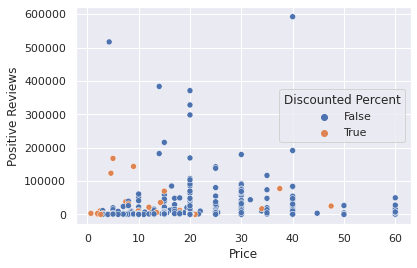

In [36]:
# Scatterplot showing performace of games with a discount
sns.scatterplot(data=df, x="Price", y="Positive Reviews", hue=df["Discounted Percent"] > 0)

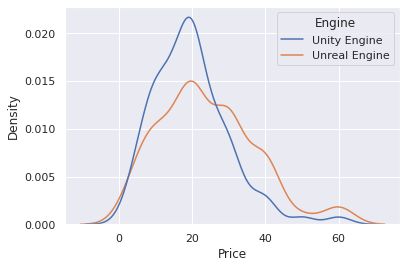

In [33]:
# Density Plot showing Price differences between different engines
sns.kdeplot(data=df, x="Price", hue="Engine")
plt.show()